# Physics 512 - Optics Lab

## Tucker Knaak - Department of Physics, Creighton University - Spring 2022

### Lasers and Fiber Optics Lab

#### When light is constrained to a particular finite size, it necessarily must have a divergence associated with it. The result is that no laser beam can ever be perfectly collimated, and the narrower the beam (or laser spot) the faster the beam diverges. In this lab you will be exploring how to measure the diameter of a Gaussian laser beam, and how to use this knowledge to couple light into optical fibers with various diameters. In addition you will be exploring what it means for a fiber to be single-mode or multi-mode.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

'''Required Functions'''
from scipy.odr import ODR, Model, Data, RealData
from scipy.special import erf

#### We can measure the beam diameter by finding the distance where the beam outputs $3/4$ and $1/4$ of the total power.  Measured data for five power readings and distances are given.

In [2]:
'''Recorded data from lab'''
block_list = [-0.349, -0.146, 0, 0.137, 0.346]  #distance from center of power detector block [mm]
power_list = [7.88, 6.13, 4.38, 2.63, 0.88]     #power of beam [mW]

'''Reported error'''
block_err = [0.001 for _ in range(len(block_list))]
power_err = [0.01 for _ in range(len(power_list))]

#### The power as a function of the distance from the center of the power detector blocked is given by $P(x_{block})=\frac{P_0}{2}\left(1+\text{erf}\left(-\frac{\sqrt{2}x_{block}}{w_x}\right)\right)$, where $w_x$ is the $1/e^2$ radii of the beam.

The best-fit 1/e^2 beam width is wx = 0.537 ± 0.002mm.


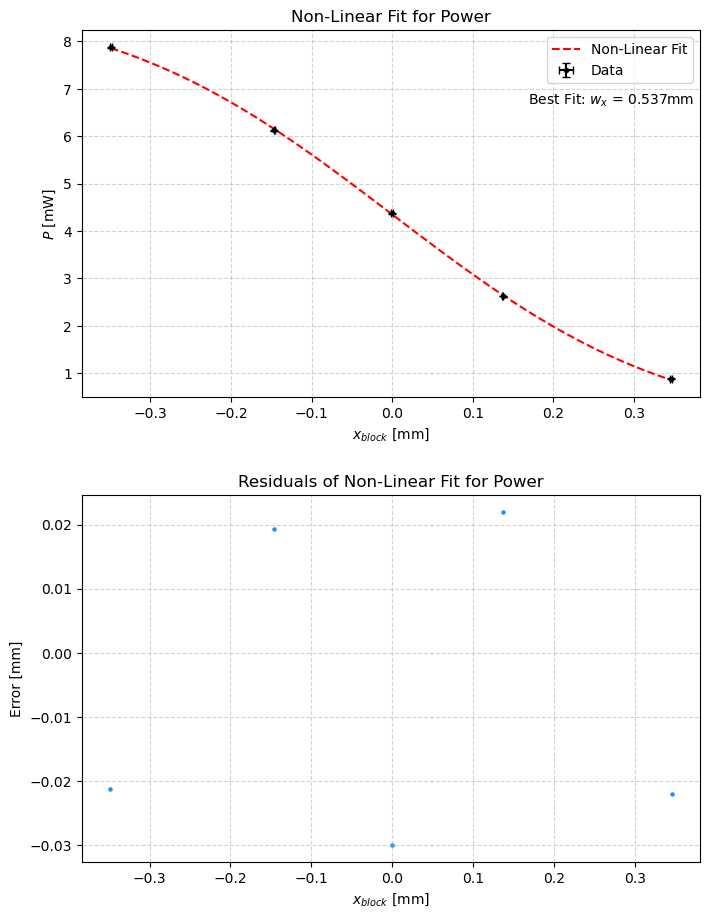

In [3]:
'''Function to calculate the power'''
def power(params: list, x: float):
    P0 = 8.70  #total power of beam [mW]
    arg = -np.sqrt(2) * x / params[0]
    return P0 * (1 + erf(arg)) / 2

'''Non-linear scipy.odr curvefit'''
data = RealData(block_list, power_list, block_err, power_err)
model = Model(power)
pguess = [0.5]
odr = ODR(data, model, pguess)
output = odr.run()
wx, wx_err = output.beta[0], output.sd_beta[0] / np.sqrt(len(block_list))
residuals = [power([wx], x) - P for x, P in zip(block_list, power_list)]
print(f'The best-fit 1/e^2 beam width is wx = {wx:.3f} \u00B1 {wx_err:.3f}mm.')

'''Plot results'''
block_points = np.linspace(min(block_list), max(block_list), 100, endpoint = True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
fig.tight_layout(pad = 5.0)

'''First figure --> Non-linear fit'''
ax1.set_xlabel('$x_{block}$ [mm]')
ax1.set_ylabel('$P$ [mW]')
ax1.set_title('Non-Linear Fit for Power')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax1.plot(block_points, power([wx], block_points), linestyle = 'dashed', color = 'red', label = 'Non-Linear Fit')
ax1.errorbar(block_list, power_list, power_err, block_err, capsize = 3, fmt = 'k.', label = 'Data')
ax1.legend(loc = 'upper right')
ax1.annotate(f'Best Fit: $w_x$ = {wx:.3f}mm', xy = (0.855, 0.81), xycoords = 'axes fraction',
             ha = 'center', va = 'center', fontsize = 10)

'''Second figure --> Residuals'''
ax2.set_xlabel('$x_{block}$ [mm]')
ax2.set_ylabel('Error [mm]')
ax2.set_title('Residuals of Non-Linear Fit for Power')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax2.scatter(block_list, residuals, color = 'dodgerblue', s = 5)

'''Save figure'''
fig.savefig('c:/Users/Tucker Knaak/Downloads/BeamWidth_NonLinearFit.png')